## Import the libraries

In [67]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense, Lambda
from keras.losses import binary_crossentropy

## Load the data

In [68]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

## Normalize the data

We want the pixels values between 0 and 1 instead of between 0 and 255

In [69]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Flatten the images for the Fully-Connected Networks

In [70]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

___

# **Simple Autoencoder**

### Create the network

The first network is the most simple autoencoder. It has three layers : Input - encoded - decoded

In [71]:
input_size = 784
hidden_size = 128
code_size = 2

x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(x)
h = Dense(code_size)(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(h)
r = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [72]:
autoencoder.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 2)              │           258 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,258 (790.07 KB)

 Trainable params: 202,258 (790.07 KB)

 Non-trainable params: 0 (0.00 B)

### Train the network

In [73]:
epochs = 50
batch_size = 128

In [74]:
history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2571 - val_loss: 0.2253
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2182 - val_loss: 0.2111
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2079 - val_loss: 0.2046
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2030 - val_loss: 0.2008
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1998 - val_loss: 0.1984
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1976 - val_loss: 0.1968
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1961 - val_loss: 0.1955
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1948 - val_loss: 0.1947
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1938 - val_loss: 0.1936
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1930 - val_loss: 0.1932
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1922 - val_loss: 0.1922
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

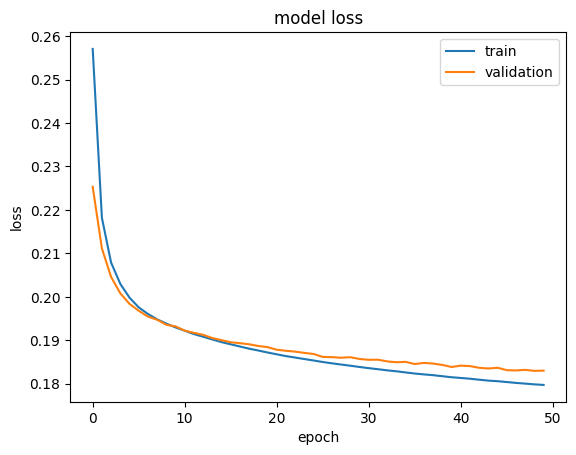

In [75]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

### Plot the 2D Latent representation

In [76]:
encoder = Model(x, h)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step


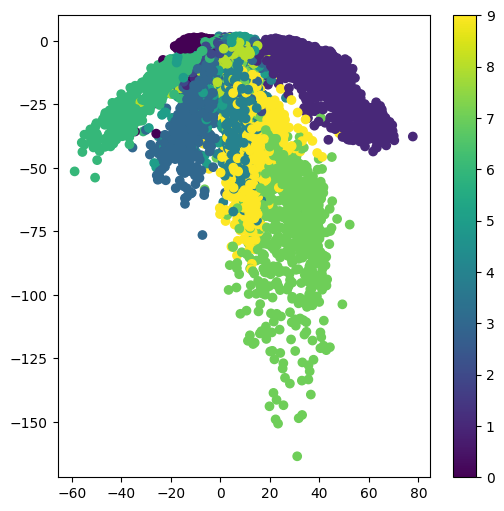

In [77]:
x_test_encoded = encoder.predict(X_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

___

# **Variational Autoencoder**

In [78]:
original_dim = 784
latent_dim = 2
intermediate_dim = 256
epsilon_std = 1.0

### Define the VAE model

In [79]:
class VAE(keras.Model):
    def __init__(self, original_dim, intermediate_dim, latent_dim, **kwargs):
        super().__init__(**kwargs)
        self.encoder_dense = Dense(intermediate_dim, activation='relu')
        self.z_mean_dense = Dense(latent_dim)
        self.z_log_var_dense = Dense(latent_dim)
        self.decoder_dense = Dense(intermediate_dim, activation='relu')
        self.decoder_output = Dense(original_dim, activation='sigmoid')
        self.original_dim = original_dim

    def encode(self, x):
        h = self.encoder_dense(x)
        z_mean = self.z_mean_dense(h)
        z_log_var = self.z_log_var_dense(h)
        return z_mean, z_log_var

    def sample(self, z_mean, z_log_var):
        epsilon = keras.random.normal(shape=keras.ops.shape(z_mean))
        return z_mean + keras.ops.exp(z_log_var / 2) * epsilon

    def decode(self, z):
        h = self.decoder_dense(z)
        return self.decoder_output(h)

    def call(self, x):
        z_mean, z_log_var = self.encode(x)
        z = self.sample(z_mean, z_log_var)
        x_decoded = self.decode(z)

        # KL divergence loss
        kl_loss = -0.5 * keras.ops.sum(
            1 + z_log_var - keras.ops.square(z_mean) - keras.ops.exp(z_log_var), axis=-1
        )
        self.add_loss(keras.ops.mean(kl_loss))

        return x_decoded

In [80]:
vae = VAE(original_dim, intermediate_dim, latent_dim)
vae.compile(optimizer='rmsprop', loss='binary_crossentropy')

### Train the VAE

In [81]:
history = vae.fit(X_train, X_train, shuffle=True, epochs=epochs,
                  batch_size=batch_size, validation_data=(X_test, X_test))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3960 - val_loss: 0.2676
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2652 - val_loss: 0.2637
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2637 - val_loss: 0.2631
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2634 - val_loss: 0.2630
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2632 - val_loss: 0.2629
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2631 - val_loss: 0.2628
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2631 - val_loss: 0.2628
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2630 - val_loss: 0.2627
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2630 - val_loss: 0.2627
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2630 - val_loss: 0.2627
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2629 - val_loss: 0.2626
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

## Plot the losses

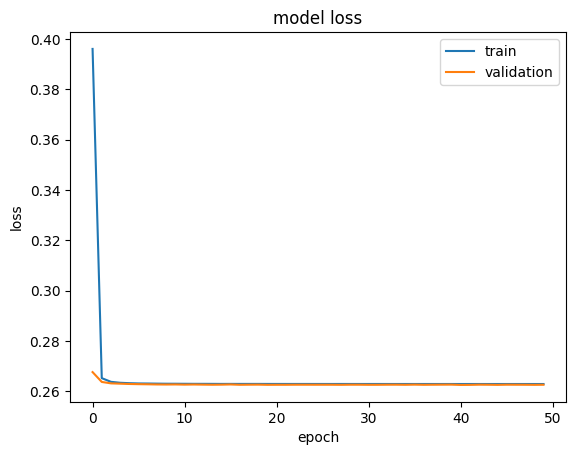

In [82]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Plot the 2D latent representation

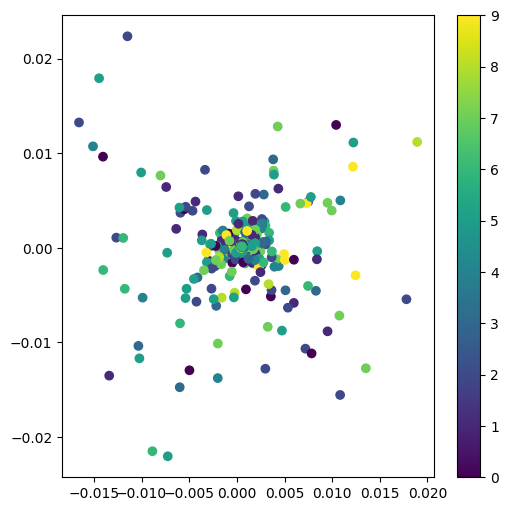

In [83]:
x_test_encoded, _ = vae.encode(X_test)
x_test_encoded = x_test_encoded.numpy()
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

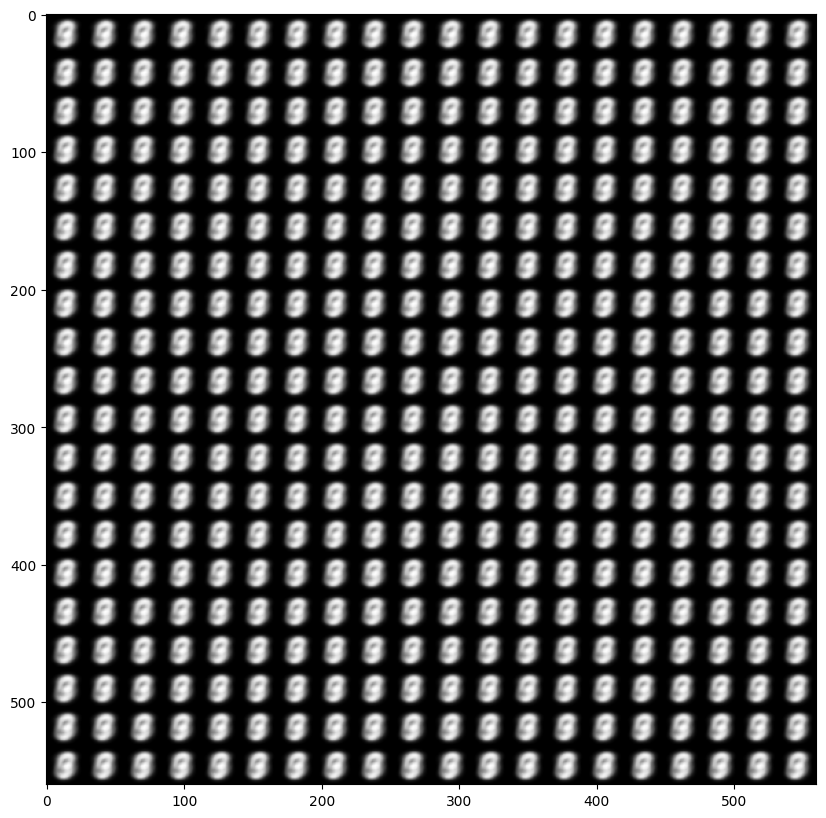

In [84]:
# display a 2D manifold of the digits
n = 20
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = vae.decode(z_sample)
        digit = x_decoded[0].numpy().reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()